In [ ]:
!pip install finance-datareader

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import FinanceDataReader as fdr
# FB 의 Prophet 을 사용하도록 하겠습니다.
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
%matplotlib inline
warnings.filterwarnings('ignore')

In [68]:
# 주가데이터 가져오기
SOXL = fdr.DataReader('SOXL')

In [69]:
SOXL.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2021-12-30,68.36,70.50,71.34,67.89,11080000.0,-0.0372
2021-12-31,68.01,68.70,70.10,67.83,10150000.0,-0.0051
2022-01-03,72.10,69.05,72.11,68.39,15710000.0,0.0601
2022-01-04,71.07,72.58,74.21,66.04,21920000.0,-0.0143
2022-01-05,64.01,69.59,71.42,63.94,20580000.0,-0.0993


In [70]:
SOXL.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2010-03-12,0.64,0.66,0.67,0.64,4550000.0,-0.0303
2010-03-15,0.62,0.63,0.64,0.61,532200.0,-0.0312
2010-03-16,0.67,0.63,0.68,0.63,1260000.0,0.0806
2010-03-17,0.70,0.70,0.71,0.69,2610000.0,0.0448
2010-03-18,0.68,0.70,0.70,0.67,1580000.0,-0.0286


Text(0, 0.5, 'price')

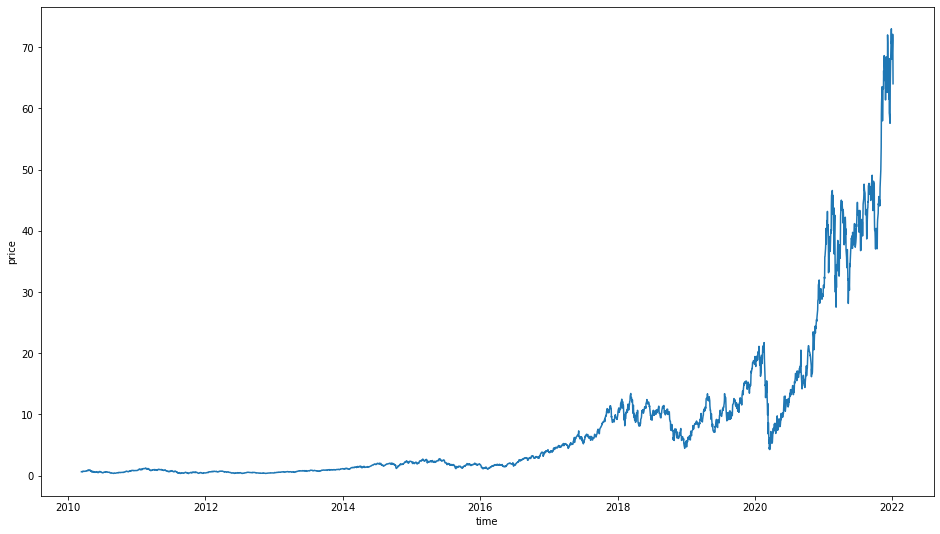

In [71]:
plt.figure(figsize = (16,9))
sns.lineplot(y = SOXL['Close'], x = SOXL.index)
plt.xlabel('time')
plt.ylabel('price')

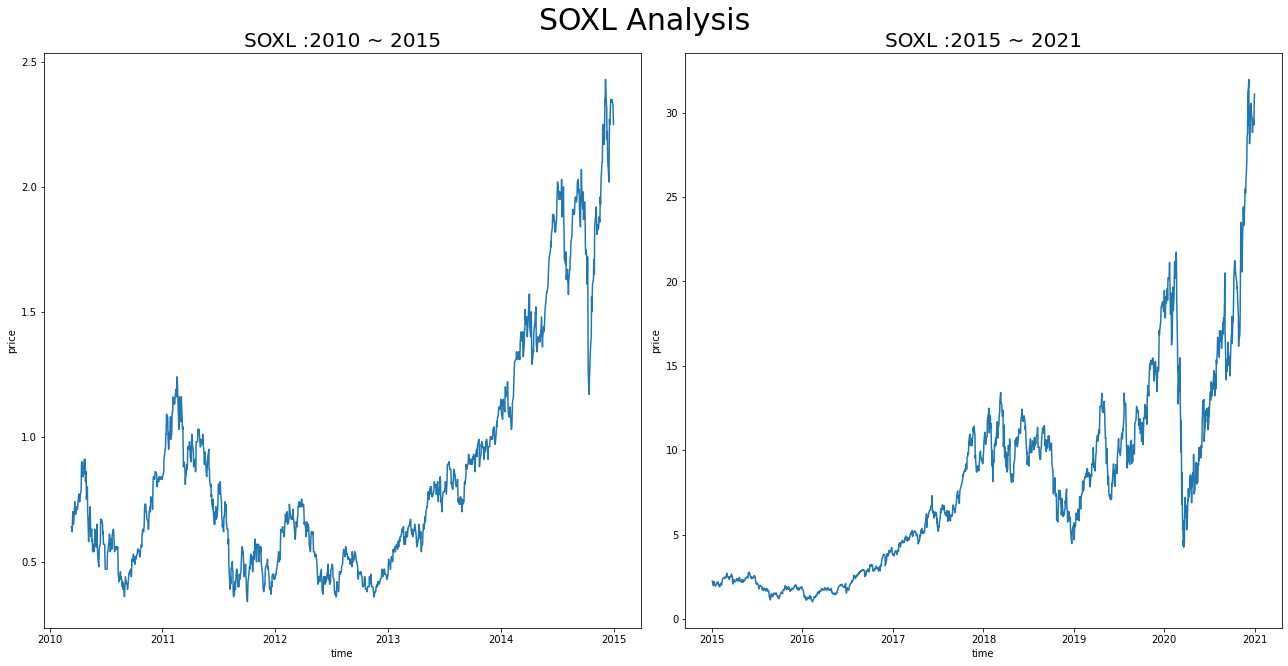

In [72]:
time_steps = [['2010', '2015'],
              ['2015', '2021']]

fig, axes = plt.subplots(1, 2)
axes
fig.set_size_inches(18, 9)
for i in range(2):
  ax = axes[i]
  df = SOXL.loc[(SOXL.index > time_steps[i][0]) & (SOXL.index < time_steps[i][1])]
  sns.lineplot(y = df['Close'], x = df.index, ax = ax)
  ax.set_title(f'SOXL :{time_steps[i][0]} ~ {time_steps[i][1]}', fontsize = 20)
  ax.set_xlabel('time')
  ax.set_ylabel('price')

plt.suptitle('SOXL Analysis', size = 30, verticalalignment = 'center' ,y = 1)
plt.tight_layout()
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


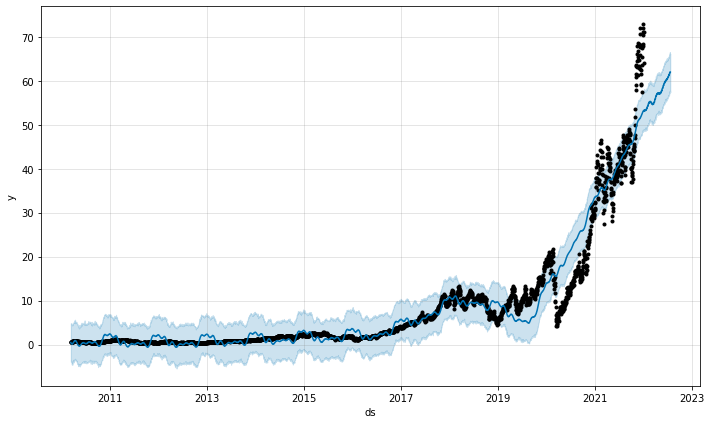

In [76]:
SOXL['y'] = SOXL['Close']  # 종가 예측을 하기위해서는 y를 설정해주어야 합니다.
SOXL['ds'] = SOXL.index
SOXL.head()

# 객체 선언
m = Prophet()
m.fit(SOXL)

# 추후 예측할 기간을 지정
future = m.make_future_dataframe(periods=200)
# 예측
forecaset = m.predict(future)
fig = m.plot(forecaset)

In [77]:
forecaset[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-40:-20]

,ds,yhat,yhat_lower,yhat_upper
3137,2022-06-15,59.838669,55.754721,64.380590
3138,2022-06-16,59.887324,55.186389,64.250406
3139,2022-06-17,59.941968,55.800986,64.569465
3140,2022-06-18,59.816540,55.243125,64.164838
3141,2022-06-19,59.860255,55.417798,64.433112
3142,2022-06-20,60.081088,55.436440,64.543176
3143,2022-06-21,60.153826,55.728467,64.580988
3144,2022-06-22,60.148472,55.646280,64.624512
3145,2022-06-23,60.185519,55.368109,64.837073
3146,2022-06-24,60.230577,55.716920,64.405106


In [78]:
# interactive
fig = plot_plotly(m, forecaset)
fig

In [79]:
# 시즌별로 파악하기
plot_components_plotly(m, forecaset)

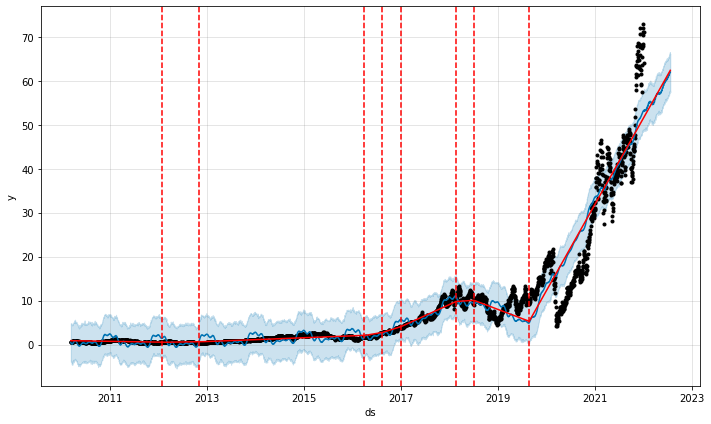

In [80]:
from fbprophet.plot import add_changepoints_to_plot
# 과대적합, 과소적합
# 파악하기
fig = m.plot(forecaset)
a = add_changepoints_to_plot(fig.gca(), m, forecaset)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


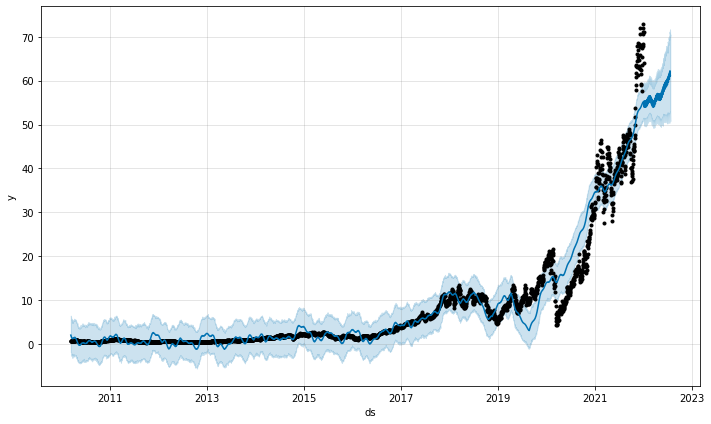

In [82]:
m = Prophet(changepoint_prior_scale=0.8)# 작은줄기의 맥락(과대적합)
forecaset = m.fit(SOXL).predict(future)
fig = m.plot(forecaset)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


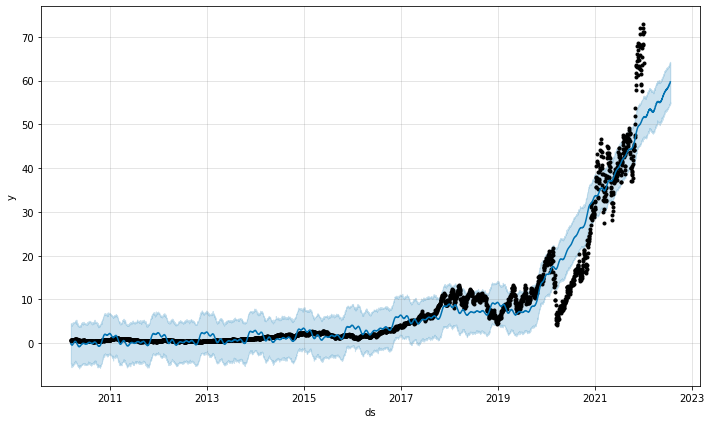

In [84]:
m = Prophet(changepoint_prior_scale=0.01)# 큰줄기의 맥락(과소적합)
forecaset = m.fit(SOXL).predict(future)
fig = m.plot(forecaset)